In [4]:
import pandas as pd
import numpy as np

male= pd.read_csv("male.csv",header=1)
female= pd.read_csv("female.csv",header=1)

In [5]:
# print(male.info())
# print(male.head())
# print(female.info())
# print(female.head())

In [6]:
# Renombrar las columnas para eliminar "Unnamed"
male.columns = [col if 'Unnamed' not in str(col) else None for col in male.columns]
female.columns = [col if 'Unnamed' not in str(col) else None for col in female.columns]

# Eliminar columnas completamente NaN
male_cleaned = male.dropna(axis=1, how='all')
female_cleaned = female.dropna(axis=1, how='all')

# Eliminar filas de encabezado y la última fila con datos no deseados
male_cleaned = male_cleaned.iloc[1:-1]
female_cleaned = female_cleaned.iloc[1:-1]

# Eliminar columnas donde todos los valores sean "a"
male_cleaned = male_cleaned.loc[:, ~(male_cleaned.apply(lambda col: col.astype(str).str.strip().eq('a').all(), axis=0))]
female_cleaned = female_cleaned.loc[:, ~(female_cleaned.apply(lambda col: col.astype(str).str.strip().eq('a').all(), axis=0))]

# Eliminar la última columna sin importar su nombre
male_cleaned = male_cleaned.iloc[:, :-1]  # Todas las columnas excepto la última
female_cleaned = female_cleaned.iloc[:, :-1]  # Todas las columnas excepto la última

# Eliminar filas a partir del índice 193 (fila 194 en términos humanos)
male_cleaned = male_cleaned.iloc[:193]  # Mantener solo hasta la fila 193
female_cleaned = female_cleaned.iloc[:193]  # Mantener solo hasta la fila 193

# Eliminar la primera columna (columna 0) de ambos DataFrames
male_cleaned = male_cleaned.iloc[:, 1:]  # Todas las columnas excepto la primera
female_cleaned = female_cleaned.iloc[:, 1:]  # Todas las columnas excepto la primera

# Reemplazar ".." por NaN en ambos DataFrames
male_cleaned.replace("..", np.nan, inplace=True)
female_cleaned.replace("..", np.nan, inplace=True)

# Eliminar filas con valores NaN
male_cleaned.dropna(inplace=True)
female_cleaned.dropna(inplace=True)

# Convertir columnas numéricas a float (excluyendo la columna 'Country')
for col in male_cleaned.columns[1:]:  # Desde la segunda columna en adelante
    male_cleaned[col] = male_cleaned[col].astype(float)

for col in female_cleaned.columns[1:]:  # Desde la segunda columna en adelante
    female_cleaned[col] = female_cleaned[col].astype(float)

In [7]:
# Estadísticas descriptivas
print("\n===== Estadísticas Descriptivas (Male) =====")
print(male_cleaned.describe())
print("\n===== Estadísticas Descriptivas (Female) =====")
print(female_cleaned.describe())


===== Estadísticas Descriptivas (Male) =====
             1990        1995        2000        2005        2010       2011  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.00000   
mean    76.433149   75.681768   74.631492   73.732597   73.022099   72.91547   
std      8.388193    8.505544    8.574915    8.733282    9.090744    9.08978   
min     42.200000   43.100000   42.600000   40.800000   40.400000   39.80000   
25%     71.200000   70.200000   69.100000   67.600000   67.300000   67.50000   
50%     76.900000   76.200000   75.000000   74.600000   73.800000   73.10000   
75%     82.000000   81.800000   80.700000   80.100000   79.500000   79.40000   
max     94.200000   94.600000   92.500000   94.000000   95.800000   94.60000   

             2012        2013        2014        2015        2016        2017  \
count  181.000000  181.000000  181.000000  181.000000  181.000000  181.000000   
mean    72.865746   72.816575   72.758011   72.734254   72.630939   72.

In [8]:
# # Revisar valores nulos
# print("\n===== Valores Nulos (Male) =====")
# print(male_cleaned.isnull().sum())
# print("\n===== Valores Nulos (Female) =====")
# print(female_cleaned.isnull().sum())

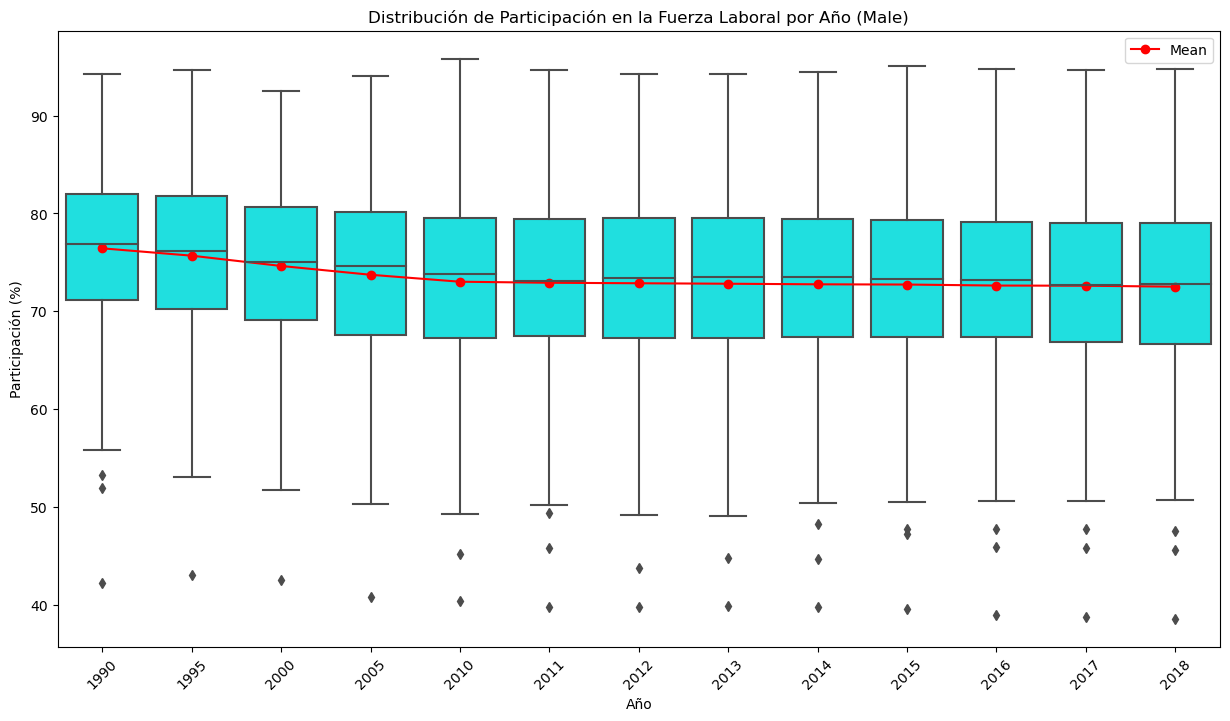

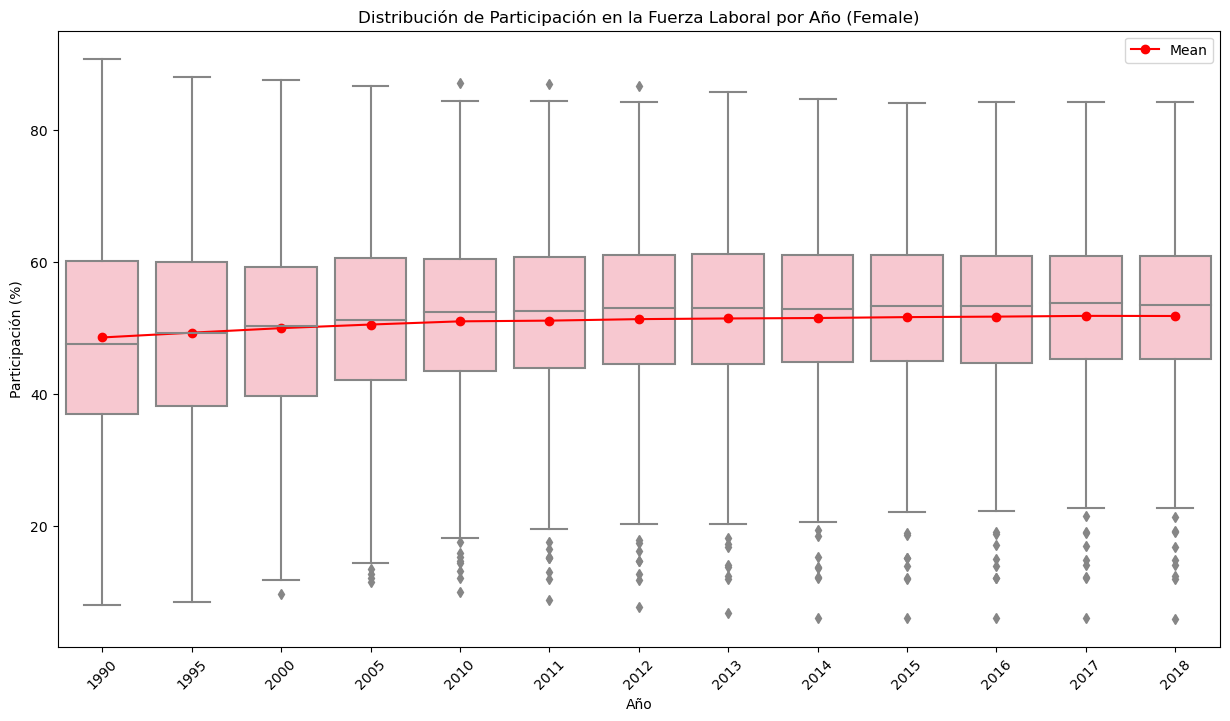

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convertir los DataFrames a formato largo
male_long = male_cleaned.melt(id_vars="Country", var_name="Year", value_name="Participation")
female_long = female_cleaned.melt(id_vars="Country", var_name="Year", value_name="Participation")

# Graficar boxplot para hombres
plt.figure(figsize=(15, 8))
sns.boxplot(data=male_long, x="Year", y="Participation", color="cyan", showfliers=True)
male_mean = male_long.groupby("Year")["Participation"].mean()
plt.plot(male_mean.index, male_mean.values, marker="o", color="red", label="Mean")
plt.title("Distribución de Participación en la Fuerza Laboral por Año (Male)")
plt.xlabel("Año")
plt.ylabel("Participación (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Graficar boxplot para mujeres
plt.figure(figsize=(15, 8))
sns.boxplot(data=female_long, x="Year", y="Participation", color="pink", showfliers=True)
female_mean = female_long.groupby("Year")["Participation"].mean()
plt.plot(female_mean.index, female_mean.values, marker="o", color="red", label="Mean")
plt.title("Distribución de Participación en la Fuerza Laboral por Año (Female)")
plt.xlabel("Año")
plt.ylabel("Participación (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [10]:
def remove_outliers(df):
    numeric_cols = df.columns[1:]  # Excluye la columna 'Country'
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Aplicar eliminación de outliers
male_df = remove_outliers(male_cleaned)
female_df = remove_outliers(female_cleaned)

# Verificar los resultados
print(f"Filas originales (Male): {len(male_cleaned)}, sin outliers: {len(male_df)}")
print(f"Filas originales (Female): {len(female_cleaned)}, sin outliers: {len(female_df)}")

Filas originales (Male): 181, sin outliers: 177
Filas originales (Female): 181, sin outliers: 159


1. Alta correlación entre años consecutivos
En ambas matrices, los años consecutivos presentan una correlación muy alta (cercana a 1.0). Esto indica que la participación en la fuerza laboral no cambió drásticamente entre años consecutivos. Es decir, los datos tienen una tendencia temporal suave, sin grandes fluctuaciones interanuales.

Ejemplo:

En la matriz de hombres, la correlación entre 2017 y 2018 es cercana a 0.99.
En la matriz de mujeres, la correlación entre 2010 y 2011 es también cercana a 0.99.
2. Correlación decreciente a medida que aumenta la diferencia temporal
La correlación entre años separados por largos períodos es menor, especialmente entre los primeros y últimos años de la serie (1990 frente a 2018). Esto indica que la participación ha cambiado con el tiempo, pero de manera gradual.

Ejemplo:

En la matriz de hombres, la correlación entre 1990 y 2018 es 0.80.
En la matriz de mujeres, la correlación entre 1990 y 2018 es 0.81.
Esto sugiere que hay una evolución en la participación a lo largo de los años, aunque los cambios no son abruptos.

3. Mayor variabilidad en los datos femeninos
En general, las correlaciones en la matriz de mujeres tienden a ser ligeramente más bajas que en la matriz de hombres, especialmente para los años más lejanos. Esto sugiere que la participación femenina ha experimentado mayor variabilidad o cambios a lo largo del tiempo, posiblemente debido a factores sociales, culturales o económicos.

Ejemplo:

En la matriz de hombres, la correlación entre 1990 y 2010 es 0.85.
En la matriz de mujeres, la correlación entre 1990 y 2010 es 0.86, pero los valores entre años más cercanos tienden a disminuir más rápido.
4. Años recientes están fuertemente correlacionados
Los años más recientes (2010 en adelante) muestran correlaciones extremadamente altas entre sí (cercanas a 1.0). Esto puede deberse a que los patrones de participación en la fuerza laboral se han estabilizado en los últimos años.

Conclusión para el clustering
Dado que los datos tienen correlaciones muy altas entre años consecutivos, sería una buena idea:
Seleccionar años representativos con menor correlación entre ellos (por ejemplo, uno de cada década: 1990, 2000, 2010).
Evitar incluir muchos años consecutivos, ya que podrían aportar redundancia al clustering.

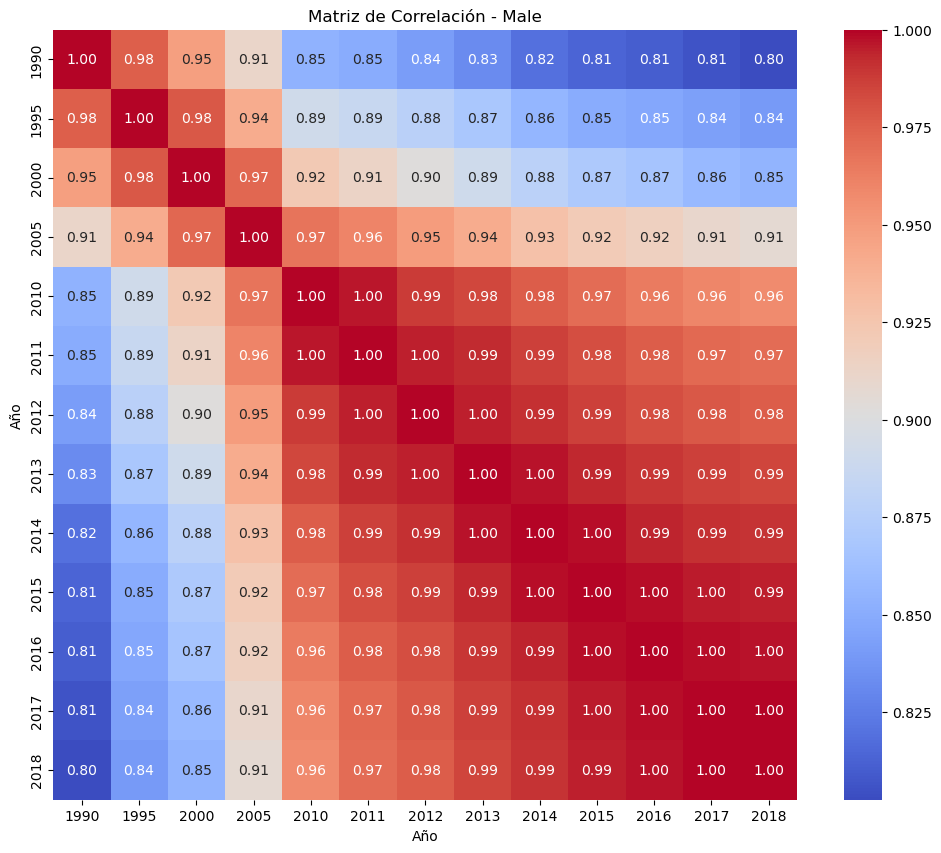

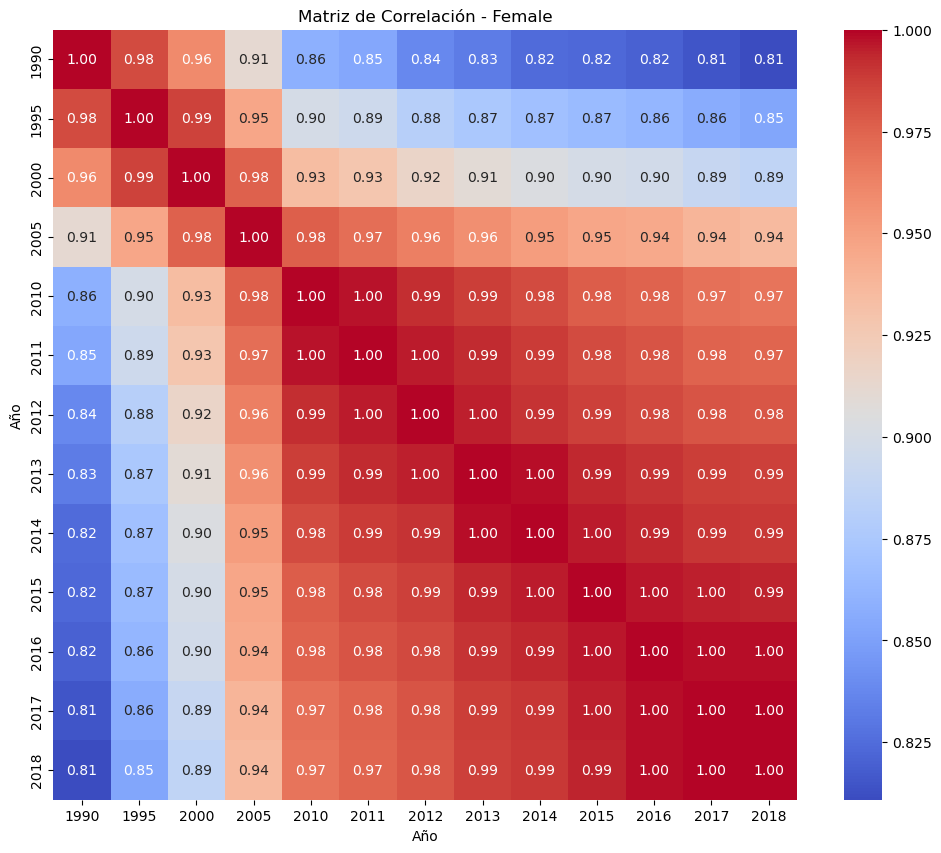

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular las correlaciones para ambos DataFrames
male_corr = male_df.iloc[:, 1:].corr()  # Excluyendo 'Country'
female_corr = female_df.iloc[:, 1:].corr()  # Excluyendo 'Country'

# Graficar la matriz de correlación para los hombres
plt.figure(figsize=(12, 10))
sns.heatmap(male_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación - Male")
plt.xlabel("Año")
plt.ylabel("Año")
plt.show()

# Graficar la matriz de correlación para las mujeres
plt.figure(figsize=(12, 10))
sns.heatmap(female_corr, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación - Female")
plt.xlabel("Año")
plt.ylabel("Año")
plt.show()


In [12]:
# Filtrar las columnas seleccionadas (1995, 2005, 2015)
male_selected = male_df[["Country", "1995", "2005", "2015"]]
female_selected = female_df[["Country", "1995", "2005", "2015"]]

# Renombrar columnas para distinguir género
male_selected.rename(columns={"1995": "1995_male", "2005": "2005_male", "2015": "2015_male"}, inplace=True)
female_selected.rename(columns={"1995": "1995_female", "2005": "2005_female", "2015": "2015_female"}, inplace=True)

# Combinar ambos DataFrames en uno solo
combined_df = pd.merge(male_selected, female_selected, on="Country")

# Verificar los datos combinados
print("===== Datos Combinados =====")
print(combined_df.head())

# Verificar las dimensiones
print("\nDimensiones del DataFrame combinado:", combined_df.shape)

===== Datos Combinados =====
     Country  1995_male  2005_male  2015_male  1995_female  2005_female  \
0    Albania       73.9       67.9       65.2         53.8         48.1   
1     Angola       81.0       80.5       80.4         74.8         75.1   
2  Argentina       75.0       75.6       73.4         48.1         49.4   
3    Armenia       69.2       65.9       70.2         48.7         47.5   
4  Australia       74.0       72.2       71.1         53.7         57.1   

   2015_female  
0         47.7  
1         75.5  
2         47.8  
3         51.2  
4         59.1  

Dimensiones del DataFrame combinado: (156, 7)


C:\Users\Camilo\AppData\Local\Temp\ipykernel_19940\4147535458.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_selected.rename(columns={"1995": "1995_male", "2005": "2005_male", "2015": "2015_male"}, inplace=True)
C:\Users\Camilo\AppData\Local\Temp\ipykernel_19940\4147535458.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_selected.rename(columns={"1995": "1995_female", "2005": "2005_female", "2015": "2015_female"}, inplace=True)


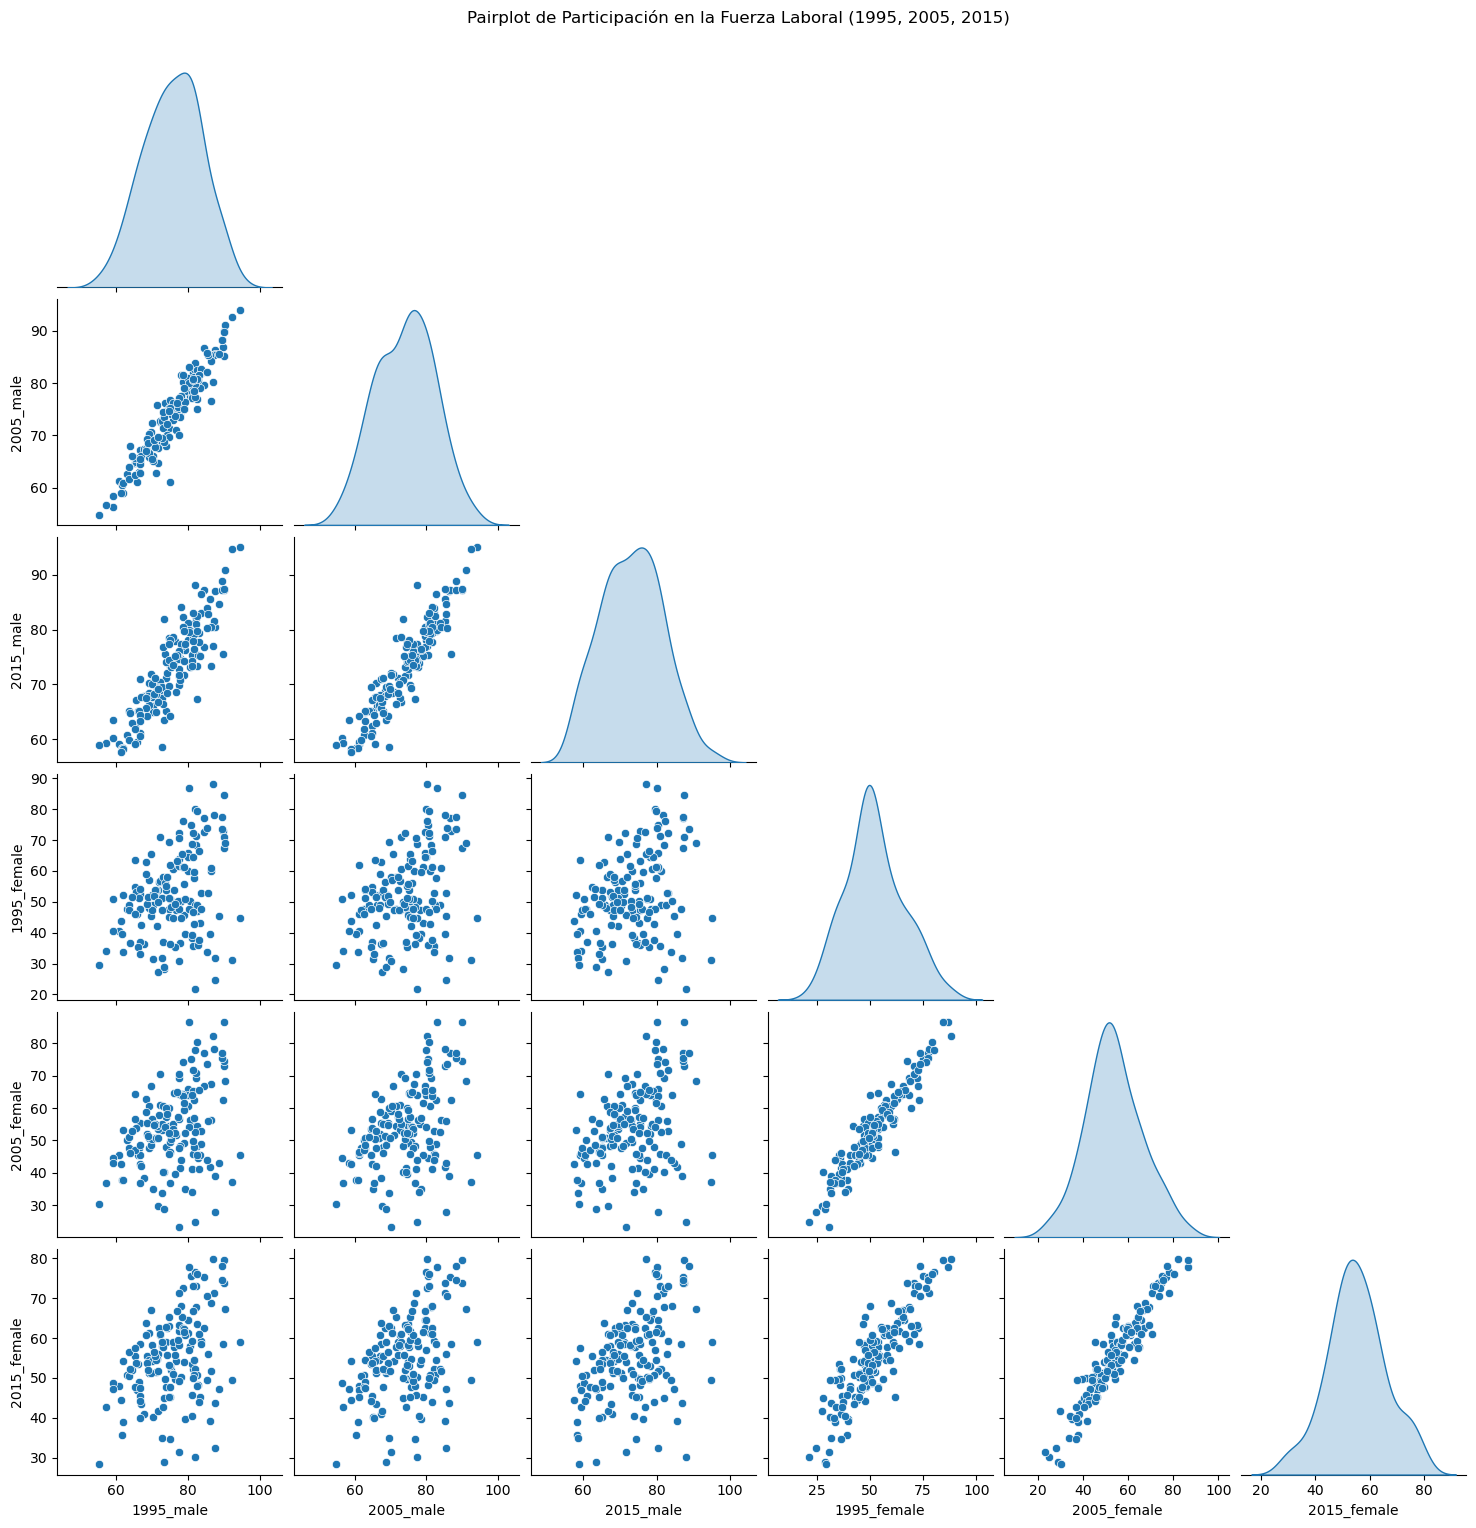

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear el pairplot con las columnas seleccionadas (excluyendo "Country")
sns.pairplot(combined_df.drop(columns=["Country"]), diag_kind="kde", corner=True)

# Mostrar el gráfico
plt.suptitle("Pairplot de Participación en la Fuerza Laboral (1995, 2005, 2015)", y=1.02)
plt.show()

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      156 non-null    object 
 1   1995_male    156 non-null    float64
 2   2005_male    156 non-null    float64
 3   2015_male    156 non-null    float64
 4   1995_female  156 non-null    float64
 5   2005_female  156 non-null    float64
 6   2015_female  156 non-null    float64
dtypes: float64(6), object(1)
memory usage: 9.8+ KB


In [15]:
combined_df.head()

,Country,1995_male,2005_male,2015_male,1995_female,2005_female,2015_female
0,Albania,73.9,67.9,65.2,53.8,48.1,47.7
1,Angola,81.0,80.5,80.4,74.8,75.1,75.5
2,Argentina,75.0,75.6,73.4,48.1,49.4,47.8
3,Armenia,69.2,65.9,70.2,48.7,47.5,51.2
4,Australia,74.0,72.2,71.1,53.7,57.1,59.1


Características seleccionadas para clustering de hombres: Index(['2015_male', '2005_male', '1995_male'], dtype='object')


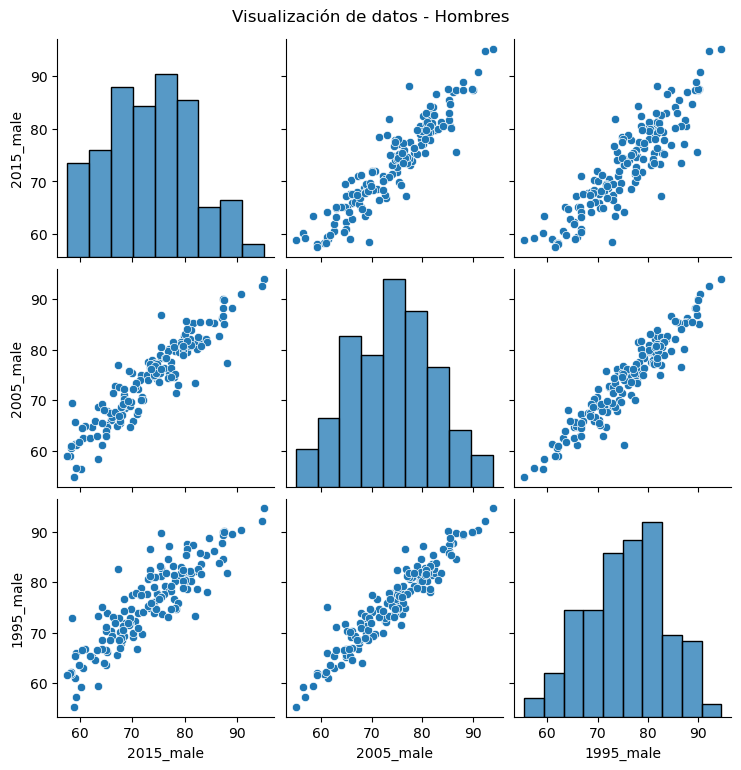

Características seleccionadas para clustering de mujeres: Index(['1995_female', '2005_female', '2015_female'], dtype='object')


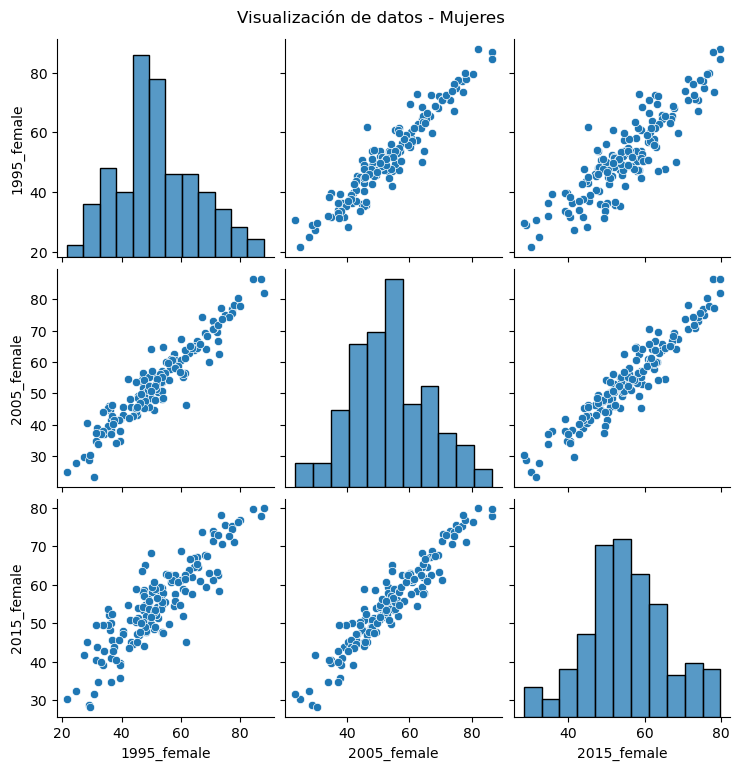

In [16]:
# Clustering para hombres
male_features = ["1995_male", "2005_male", "2015_male"]
male_data = combined_df[male_features]

# Seleccionar las tres variables con mayor varianza (ya son las únicas para hombres)
male_variances = male_data.var().sort_values(ascending=False)
male_selected_features = male_variances.index
print("Características seleccionadas para clustering de hombres:", male_selected_features)

# Visualización para hombres
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(male_data[male_selected_features])
plt.suptitle("Visualización de datos - Hombres", y=1.02)
plt.show()

# Clustering para mujeres
female_features = ["1995_female", "2005_female", "2015_female"]
female_data = combined_df[female_features]

# Seleccionar las tres variables con mayor varianza (ya son las únicas para mujeres)
female_variances = female_data.var().sort_values(ascending=False)
female_selected_features = female_variances.index
print("Características seleccionadas para clustering de mujeres:", female_selected_features)

# Visualización para mujeres
sns.pairplot(female_data[female_selected_features])
plt.suptitle("Visualización de datos - Mujeres", y=1.02)
plt.show()

c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Camilo\AppData\Local\Temp\ipykernel_19940\2885991638.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['Cluster'] = kmeans_male.fit_predict(male_data)


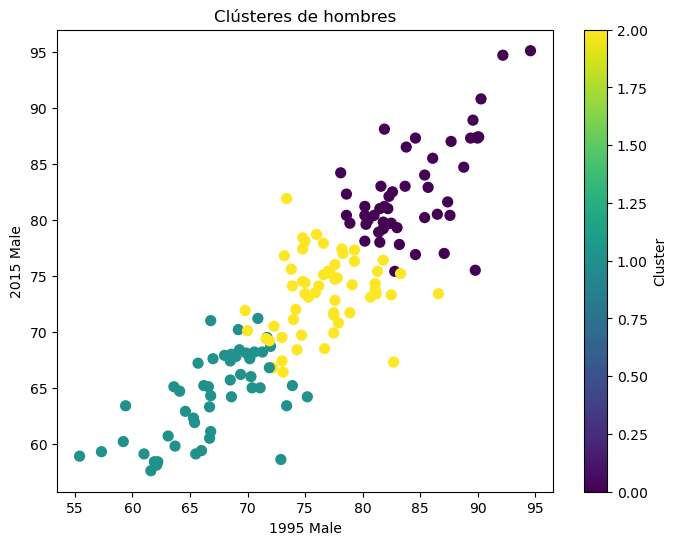

c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Camilo\AppData\Local\Temp\ipykernel_19940\2885991638.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['Cluster'] = kmeans_female.fit_predict(female_data)


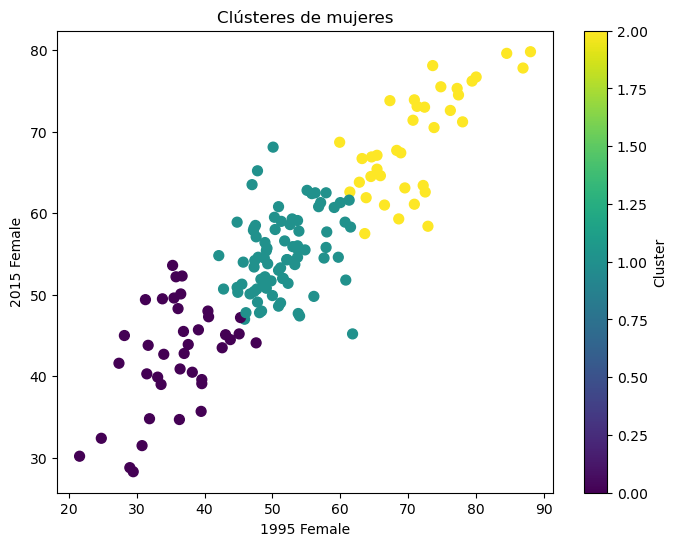

In [17]:
from sklearn.cluster import KMeans

# KMeans para hombres
kmeans_male = KMeans(n_clusters=3, random_state=42)
male_data['Cluster'] = kmeans_male.fit_predict(male_data)

# Visualización de clústeres para hombres
plt.figure(figsize=(8, 6))
plt.scatter(male_data['1995_male'], male_data['2015_male'], c=male_data['Cluster'], cmap='viridis', s=50)
plt.title("Clústeres de hombres")
plt.xlabel("1995 Male")
plt.ylabel("2015 Male")
plt.colorbar(label="Cluster")
plt.show()

# KMeans para mujeres
kmeans_female = KMeans(n_clusters=3, random_state=42)
female_data['Cluster'] = kmeans_female.fit_predict(female_data)

# Visualización de clústeres para mujeres
plt.figure(figsize=(8, 6))
plt.scatter(female_data['1995_female'], female_data['2015_female'], c=female_data['Cluster'], cmap='viridis', s=50)
plt.title("Clústeres de mujeres")
plt.xlabel("1995 Female")
plt.ylabel("2015 Female")
plt.colorbar(label="Cluster")
plt.show()

===== Resumen de Clústeres (Hombres) =====
         1995_male  2005_male  2015_male
Cluster                                 
0        84.308163  83.353061  82.546939
1        66.970588  64.696078  64.237255
2        76.637500  74.558929  73.396429

===== Resumen de Clústeres (Mujeres) =====
         1995_female  2005_female  2015_female
Cluster                                       
0          35.817949    38.738462    42.476923
1          51.512500    53.220000    55.018750
2          71.167568    70.670270    68.829730


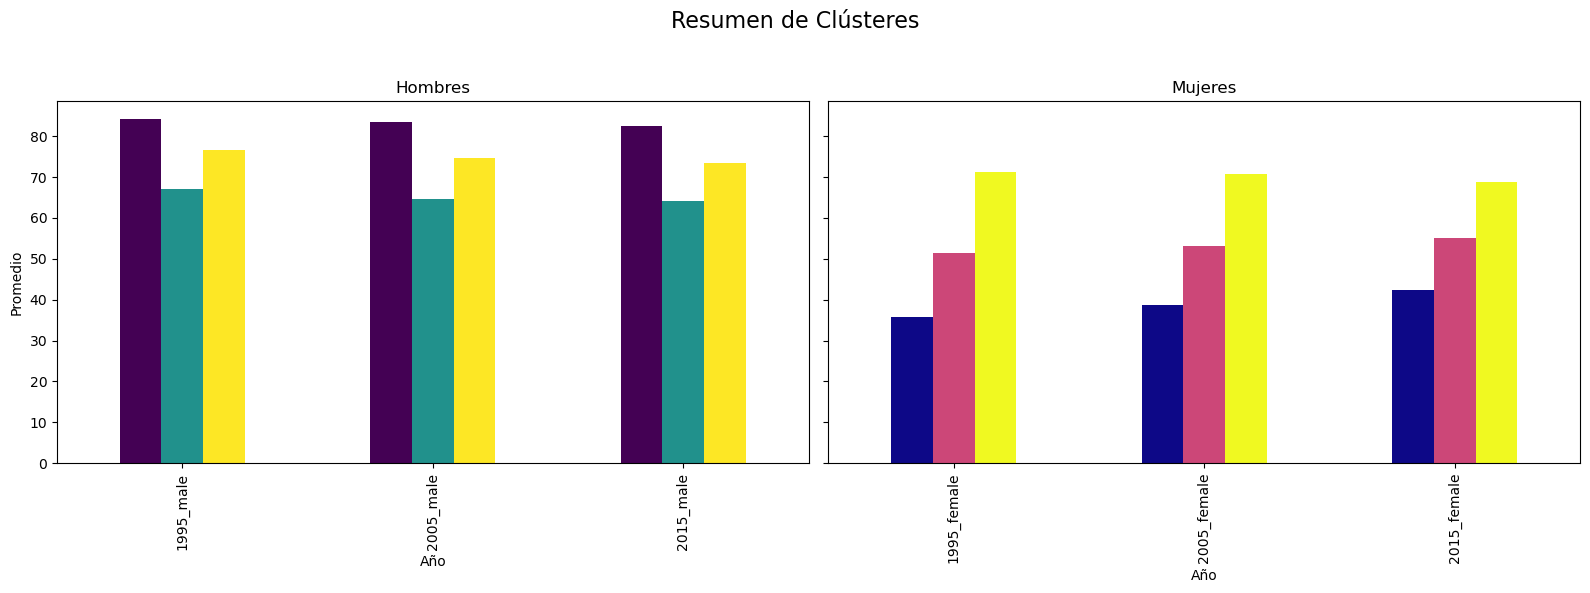

In [18]:
# Resumen de clústeres para hombres
male_cluster_summary = male_data.groupby('Cluster')[['1995_male', '2005_male', '2015_male']].mean()
print("===== Resumen de Clústeres (Hombres) =====")
print(male_cluster_summary)

# Resumen de clústeres para mujeres
female_cluster_summary = female_data.groupby('Cluster')[['1995_female', '2005_female', '2015_female']].mean()
print("\n===== Resumen de Clústeres (Mujeres) =====")
print(female_cluster_summary)

# Visualización de los resúmenes en subplots
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle('Resumen de Clústeres', fontsize=16)

# Resumen para hombres
male_cluster_summary.T.plot(kind='bar', ax=axes[0], colormap='viridis', legend=False)
axes[0].set_title("Hombres")
axes[0].set_ylabel("Promedio")
axes[0].set_xlabel("Año")

# Resumen para mujeres
female_cluster_summary.T.plot(kind='bar', ax=axes[1], colormap='plasma', legend=False)
axes[1].set_title("Mujeres")
axes[1].set_xlabel("Año")

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# CURVA DE CODO

Curva de Codo - Hombres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

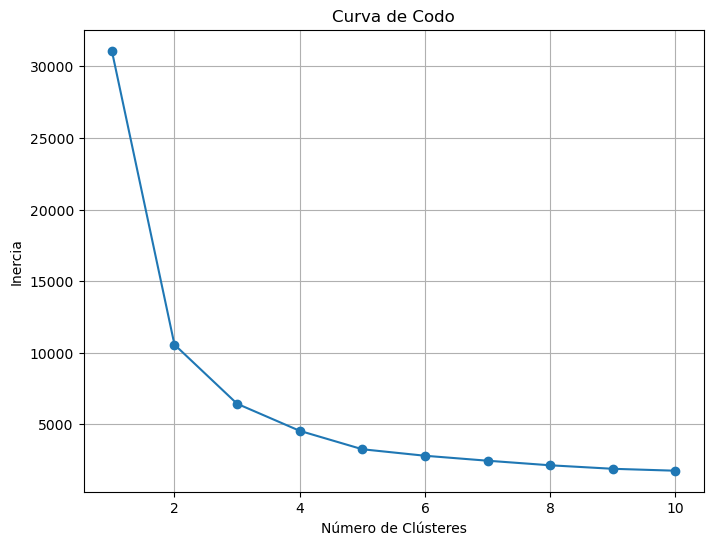

Curva de Codo - Mujeres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

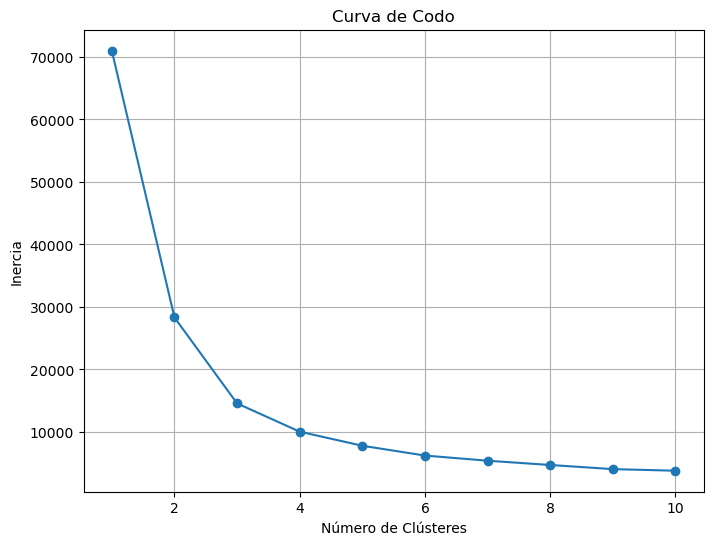

In [20]:
# Curva de codo para determinar la cantidad óptima de clústeres
def elbow_method(data, max_clusters=10):
    from sklearn.cluster import KMeans
    inertia = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertia, marker='o')
    plt.title("Curva de Codo")
    plt.xlabel("Número de Clústeres")
    plt.ylabel("Inercia")
    plt.grid()
    plt.show()

# Aplicar a los datos de hombres
print("Curva de Codo - Hombres")
elbow_method(male_data.drop(columns=['Cluster']))

# Aplicar a los datos de mujeres
print("Curva de Codo - Mujeres")
elbow_method(female_data.drop(columns=['Cluster']))

# MÉTODO DE ANALISIS DE LA SILUETA

Análisis de Silueta - Hombres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

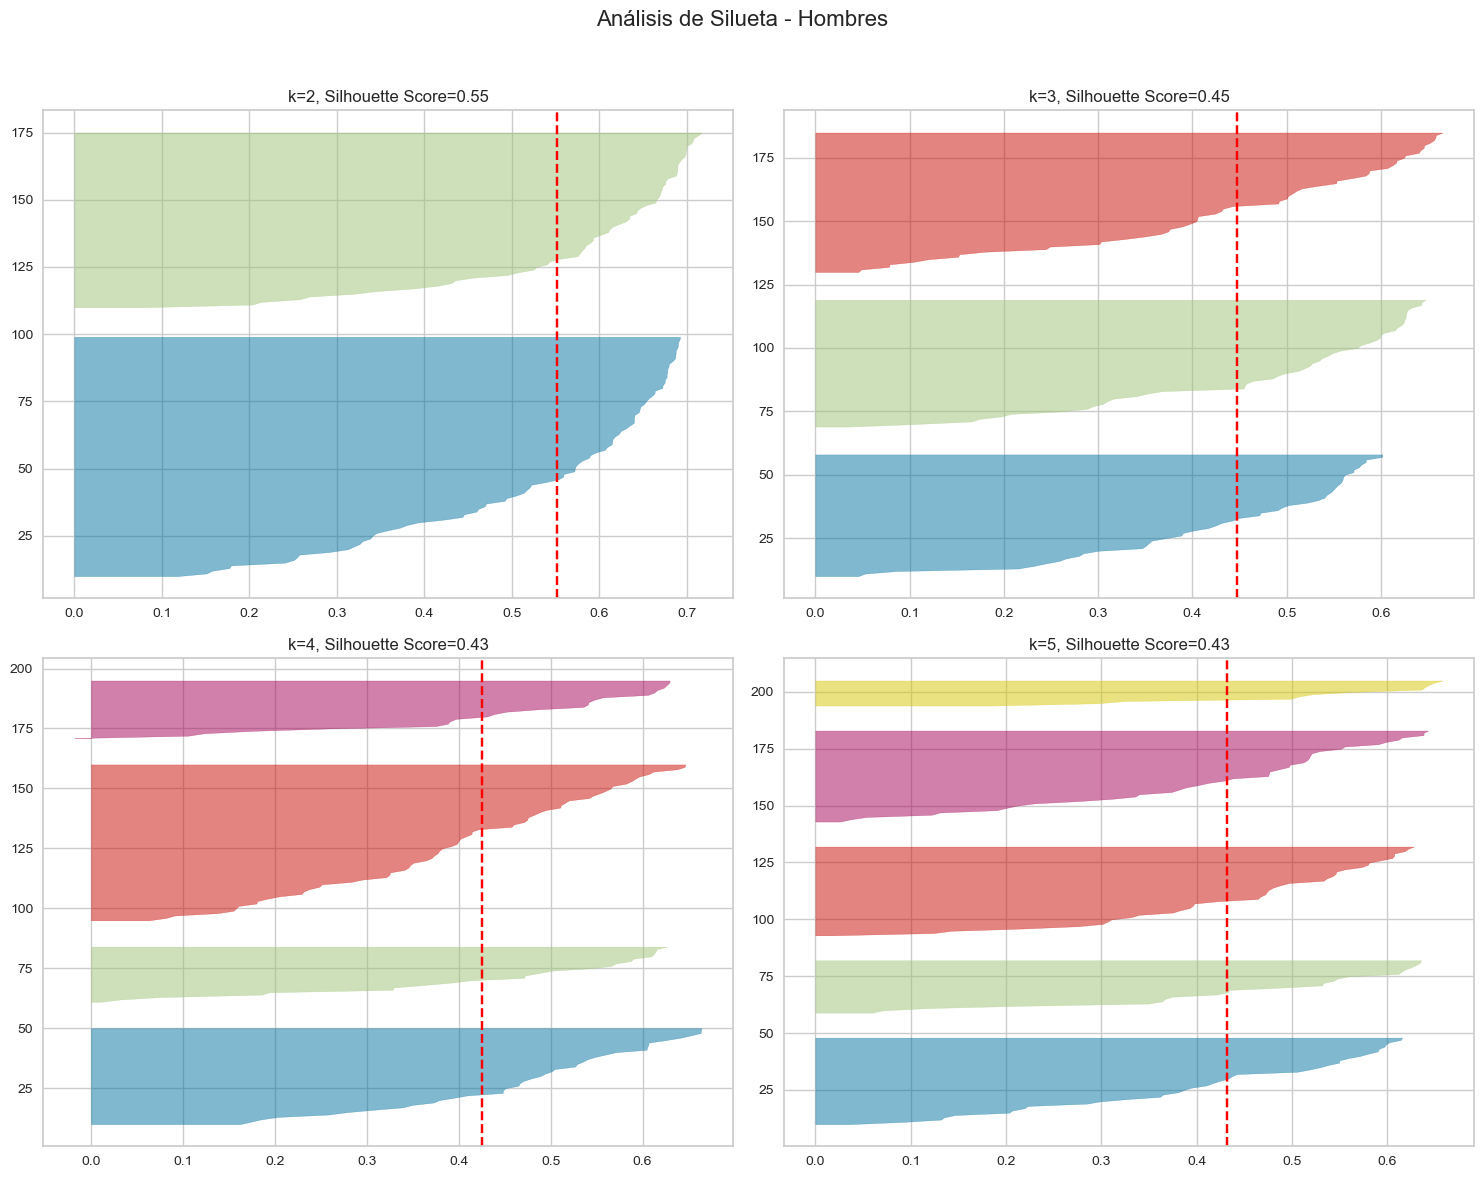

Análisis de Silueta - Mujeres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the envir

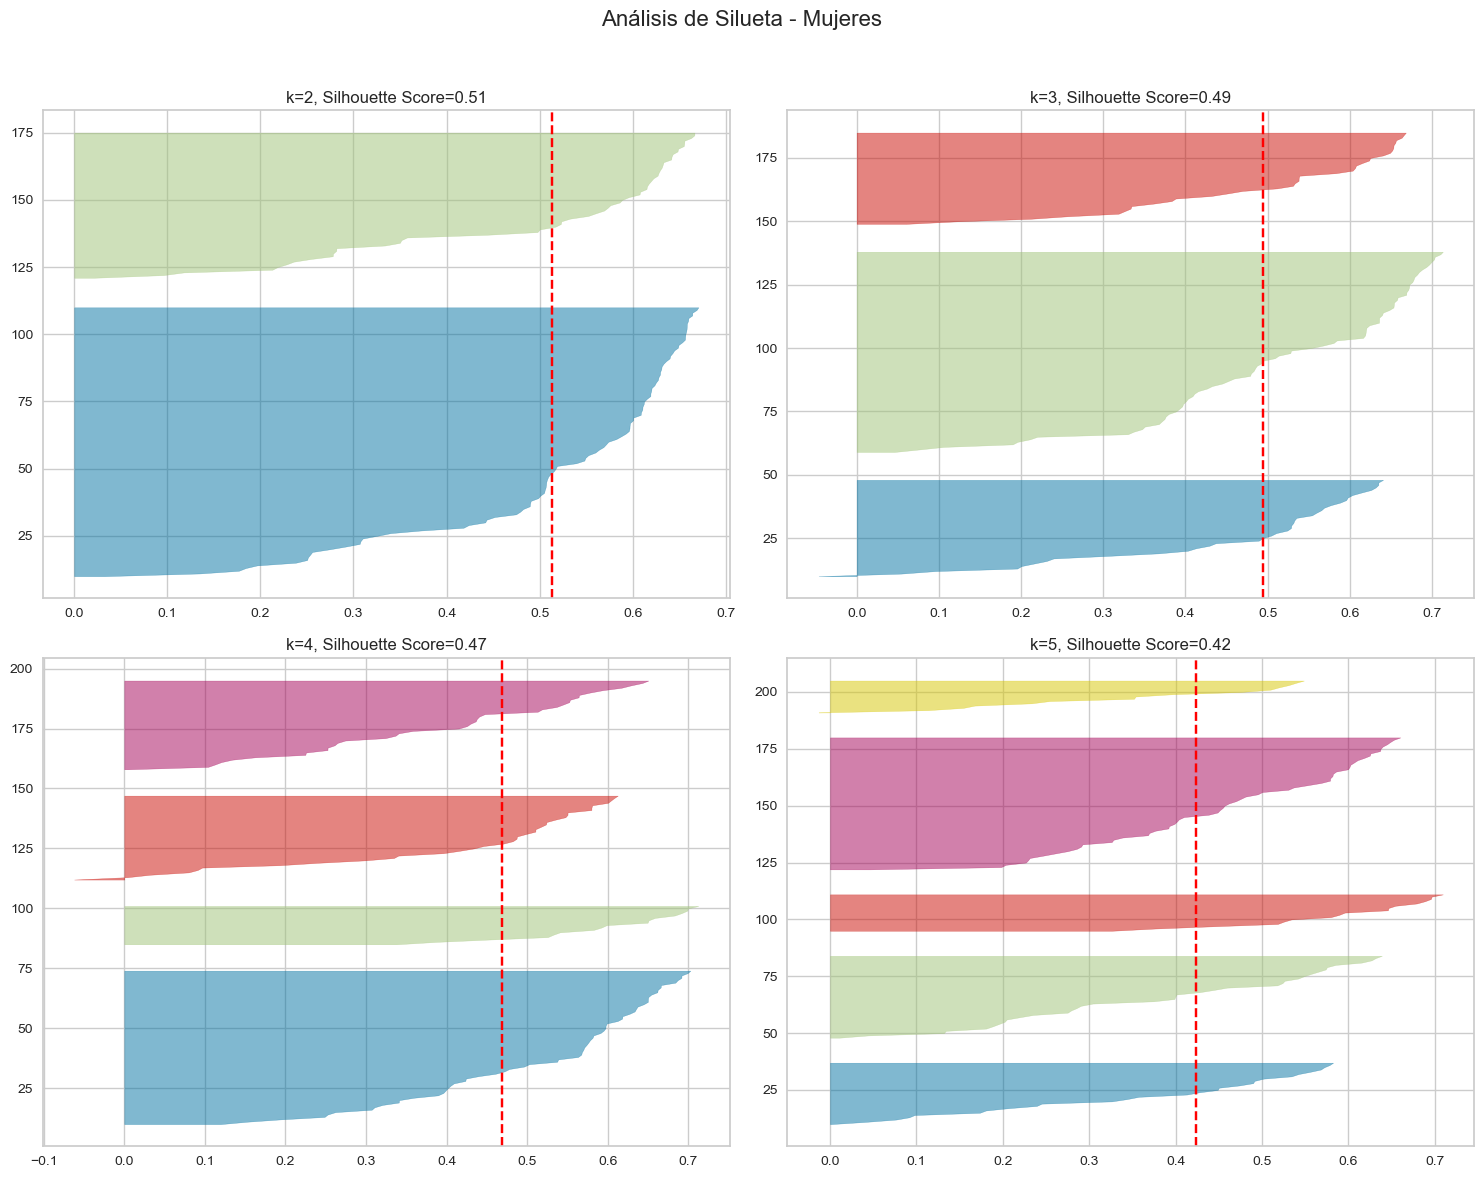

In [25]:
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Función para realizar análisis de silueta con subplots
def silhouette_with_subplots(data, title):
    fig, ax = plt.subplots(2, 2, figsize=(15, 12))
    for i, k in enumerate([2, 3, 4, 5]):
        model = KMeans(n_clusters=k, random_state=42)
        q, mod = divmod(i, 2)
        visualizer = SilhouetteVisualizer(model, colors='yellowbrick', ax=ax[q][mod])
        visualizer.fit(data)
        silhouette_avg = visualizer.silhouette_score_
        ax[q][mod].set_title(f'k={k}, Silhouette Score={silhouette_avg:.2f}')
    fig.suptitle(title, fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Análisis de silueta para hombres
print("Análisis de Silueta - Hombres")
silhouette_with_subplots(male_data.drop(columns=['Cluster']), "Análisis de Silueta - Hombres")

# Análisis de silueta para mujeres
print("Análisis de Silueta - Mujeres")
silhouette_with_subplots(female_data.drop(columns=['Cluster']), "Análisis de Silueta - Mujeres")

# ESTADÍSTICO DE GAP

Estadístico de Gap - Hombres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

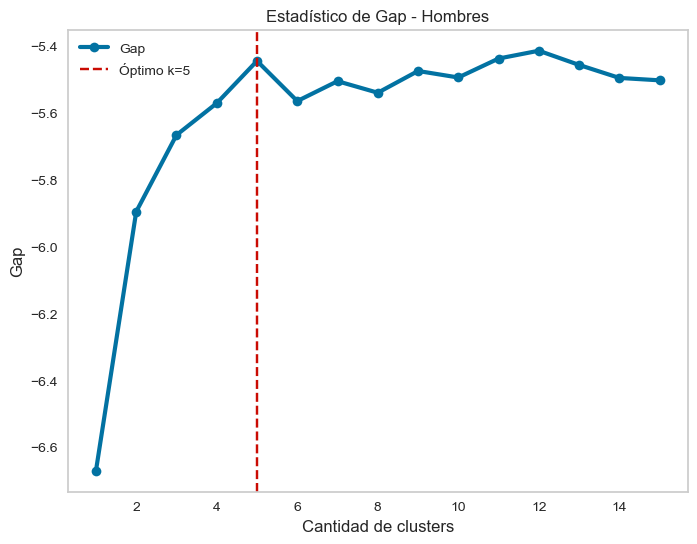

Número óptimo de clústeres para hombres: 5
Estadístico de Gap - Mujeres


c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\Camilo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Wi

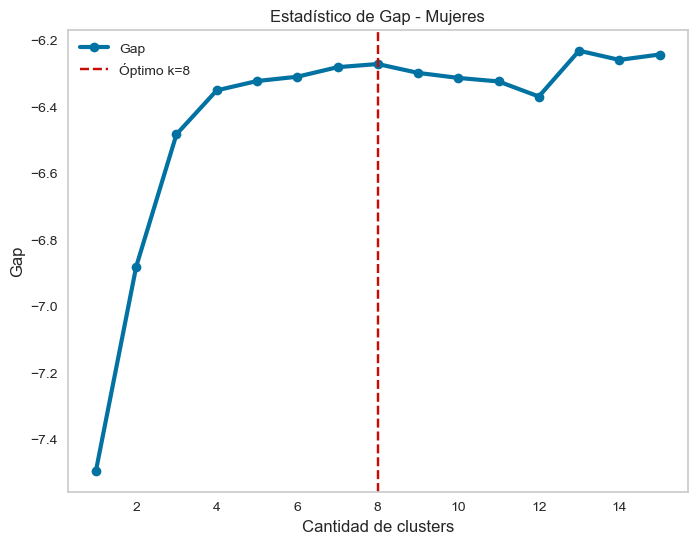

Número óptimo de clústeres para mujeres: 8


In [27]:
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

# Función para calcular el estadístico de gap
def GAPstatistic(data, maxClusters=15, nrefs=3, title="Estadístico de Gap"):
    gaps = np.zeros((maxClusters,))
    results = {'clusterCount': [], 'gap': []}
    
    for gap_index, k in enumerate(range(1, maxClusters + 1)):
        # Dispersión para datos de referencia
        refDisps = np.zeros(nrefs)
        for i in range(nrefs):
            # Generar conjunto aleatorio de referencia
            np.random.seed(i)
            randomReference = np.random.random_sample(size=data.shape)
            
            # Ajustar modelo KMeans al conjunto de referencia
            km = KMeans(n_clusters=k, n_init="auto", random_state=42)
            km.fit(randomReference)
            refDisps[i] = km.inertia_
        
        # Ajustar modelo KMeans a los datos originales
        km = KMeans(n_clusters=k, n_init="auto", random_state=42)
        km.fit(data)
        origDisp = km.inertia_
        
        # Calcular el estadístico de gap
        gap = np.log(np.mean(refDisps)) - np.log(origDisp)
        gaps[gap_index] = gap
        results['clusterCount'].append(k)
        results['gap'].append(gap)
    
    # Determinar el número óptimo de clústeres (primer máximo)
    optK = 0
    for i in range(len(gaps) - 1):
        if gaps[i + 1] <= gaps[i]:
            optK = i + 1
            break
    
    # Graficar el estadístico de gap
    plt.figure(figsize=(8, 6))
    plt.plot(results['clusterCount'], results['gap'], linewidth=3, marker='o', label='Gap')
    plt.axvline(x=optK, color='r', linestyle='--', label=f'Óptimo k={optK}')
    plt.xlabel('Cantidad de clusters')
    plt.ylabel('Gap')
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

    return optK

# Aplicar el estadístico de gap a los datos de hombres
print("Estadístico de Gap - Hombres")
optimal_k_male = GAPstatistic(male_data.drop(columns=['Cluster']), title="Estadístico de Gap - Hombres")
print(f"Número óptimo de clústeres para hombres: {optimal_k_male}")

# Aplicar el estadístico de gap a los datos de mujeres
print("Estadístico de Gap - Mujeres")
optimal_k_female = GAPstatistic(female_data.drop(columns=['Cluster']), title="Estadístico de Gap - Mujeres")
print(f"Número óptimo de clústeres para mujeres: {optimal_k_female}")

# AGRUPAMIENTO GERÁRQUICO (DENDOGRAMA)

Agrupamiento Jerárquico - Hombres


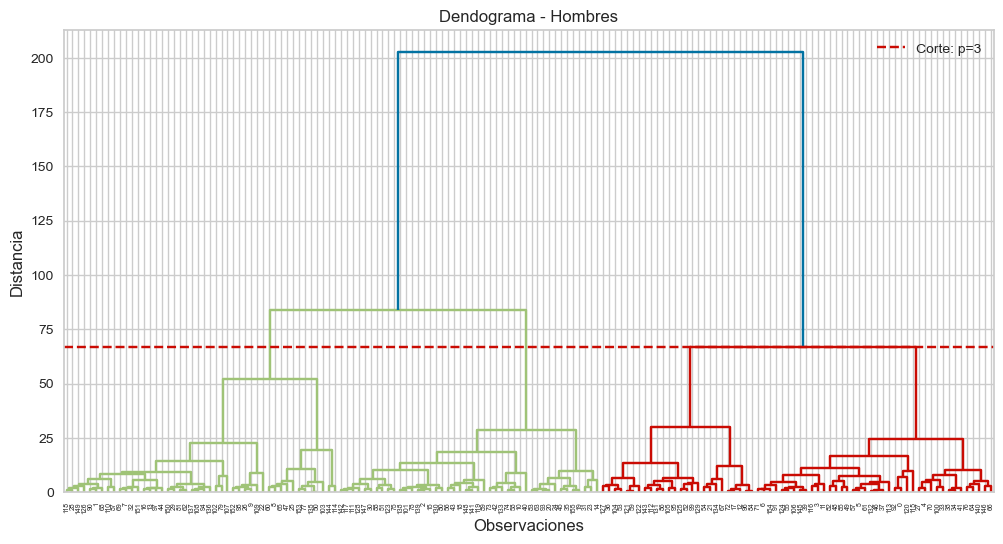

C:\Users\Camilo\AppData\Local\Temp\ipykernel_19940\562590092.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data['Hierarchical_Cluster'] = hierarchical_clustering(male_data.drop(columns=['Cluster']), "Hombres", p=3)


Agrupamiento Jerárquico - Mujeres


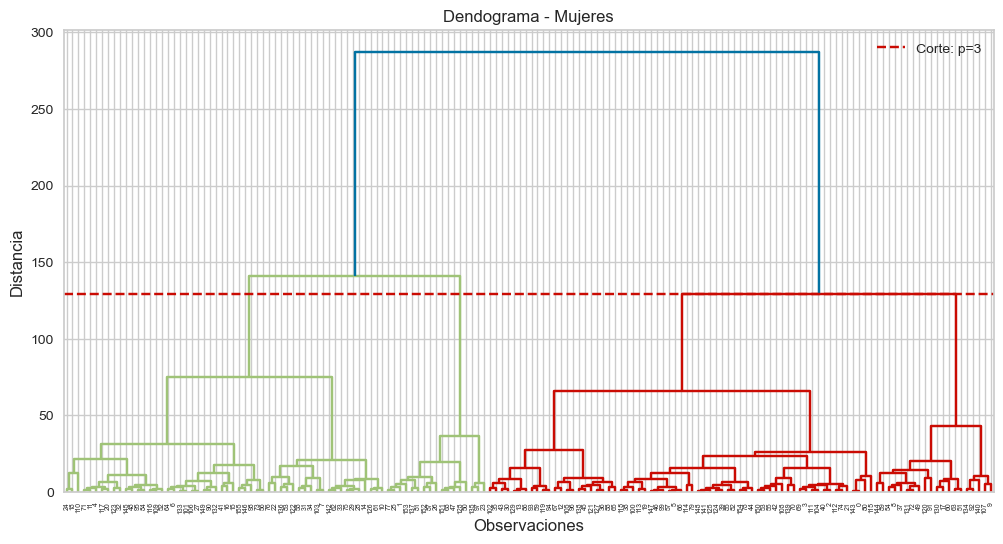

C:\Users\Camilo\AppData\Local\Temp\ipykernel_19940\562590092.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  female_data['Hierarchical_Cluster'] = hierarchical_clustering(female_data.drop(columns=['Cluster']), "Mujeres", p=3)


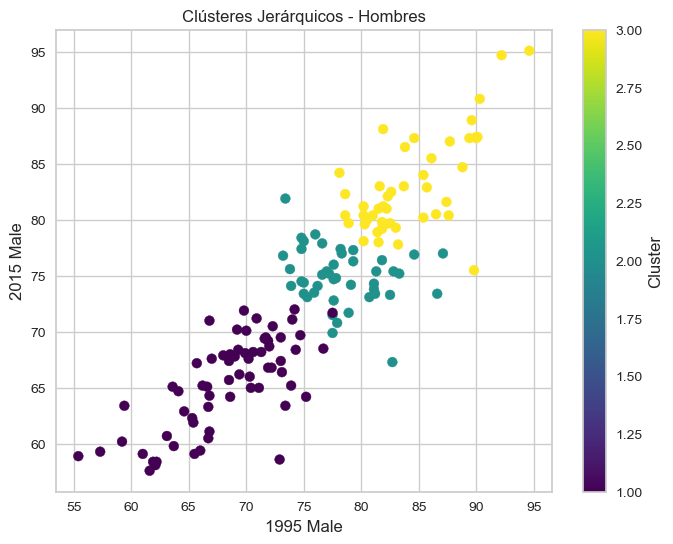

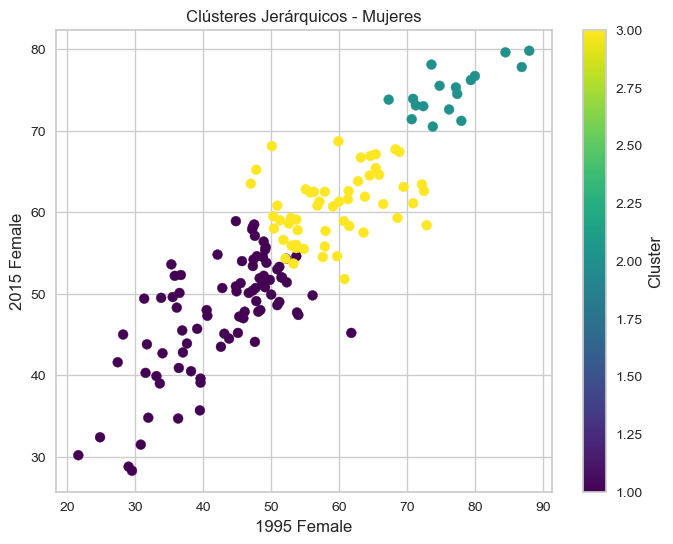

In [31]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
import matplotlib.pyplot as plt

# Función para generar dendograma y asignar clústeres con p=3
def hierarchical_clustering(data, title, p=3):
    # Generar el linkage
    linked = linkage(data, method='ward')
    
    # Generar dendograma
    plt.figure(figsize=(12, 6))
    dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
    plt.title(f"Dendograma - {title}")
    plt.xlabel("Observaciones")
    plt.ylabel("Distancia")
    plt.axhline(y=linked[-p, 2], color='r', linestyle='--', label=f'Corte: p={p}')
    plt.legend()
    plt.show()
    
    # Asignar clústeres
    clusters = fcluster(linked, t=p, criterion='maxclust')
    return clusters

# Agrupamiento jerárquico para hombres
print("Agrupamiento Jerárquico - Hombres")
male_data['Hierarchical_Cluster'] = hierarchical_clustering(male_data.drop(columns=['Cluster']), "Hombres", p=3)

# Agrupamiento jerárquico para mujeres
print("Agrupamiento Jerárquico - Mujeres")
female_data['Hierarchical_Cluster'] = hierarchical_clustering(female_data.drop(columns=['Cluster']), "Mujeres", p=3)

# Visualización de los clústeres jerárquicos para hombres
plt.figure(figsize=(8, 6))
plt.scatter(male_data['1995_male'], male_data['2015_male'], c=male_data['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title("Clústeres Jerárquicos - Hombres")
plt.xlabel("1995 Male")
plt.ylabel("2015 Male")
plt.colorbar(label="Cluster")
plt.show()

# Visualización de los clústeres jerárquicos para mujeres
plt.figure(figsize=(8, 6))
plt.scatter(female_data['1995_female'], female_data['2015_female'], c=female_data['Hierarchical_Cluster'], cmap='viridis', s=50)
plt.title("Clústeres Jerárquicos - Mujeres")
plt.xlabel("1995 Female")
plt.ylabel("2015 Female")
plt.colorbar(label="Cluster")
plt.show()